In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Utilities as U, Parsers as P
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
omp = 1
mpi_run = 'mpirun -np 8'

# Analysis of the Dos

In [4]:
si_scf_file = 'QeCalculator_test/si_scf_test1.save/data-file-schema.xml'
si_nscf_file = 'QeCalculator_test/si_nscf_test1.save/data-file-schema.xml'

In [5]:
dos = U.Dos.from_Pw(results=si_scf_file,
                    label='si_scf',broad_kind=U.lorentzian,eta = 0.1)

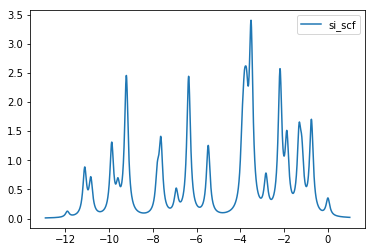

In [10]:
dos.plot(plt)
plt.legend()

In [6]:
x,d = dos.dos[0]

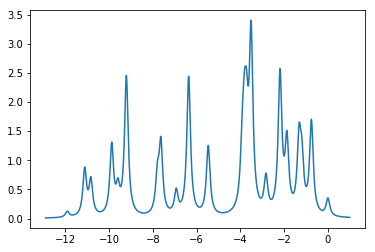

In [7]:
plt.plot(x,d)

In [11]:
dos.append_fromPw(results=si_nscf_file,label='si_nscf',eta = 0.1)

In [12]:
dos.dos

[(array([-12.90294112, -12.89294112, -12.88294112, ...,   0.97705888,
           0.98705888,   0.99705888]),
  array([0.01114543, 0.01123445, 0.01132495, ..., 0.02095892, 0.02075859,
         0.02056193])),
 (array([-12.90290659, -12.89290659, -12.88290659, ...,  10.94709341,
          10.95709341,  10.96709341]),
  array([0.01203619, 0.01212629, 0.01221787, ..., 0.01402792, 0.01387678,
         0.01372952]))]

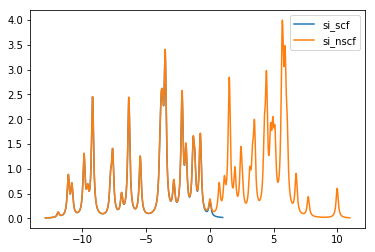

In [13]:
dos.plot(plt)
plt.legend()

In [14]:
x,d = dos.dos[1]

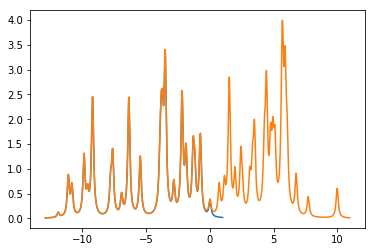

In [15]:
for dd in dos.dos:
    x,d = dd
    plt.plot(x,d)

In [16]:
energies = np.array([-5,0,3])
weights = np.array([1,1,0.5])

In [17]:
dos.append(energies,weights=weights,label='more',eta=0.1)

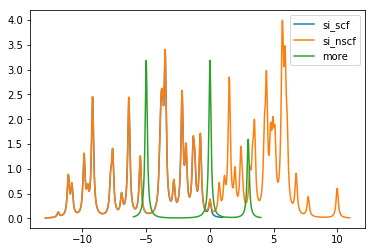

In [18]:
dos.plot(plt)
plt.legend()

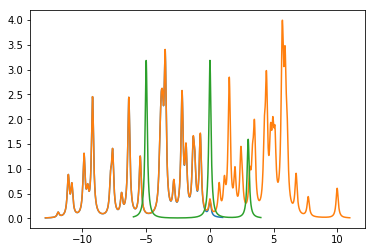

In [53]:
for dd in dos.dos:
    x,d = dd
    plt.plot(x,d)

In [ ]:
###################################################################################################

In [52]:
si_scf = P.PwParser('QeCalculator_test/si_scf_test1.save/data-file-schema.xml')

Parse file : QeCalculator_test/si_scf_test1.save/data-file-schema.xml


In [53]:
energies = si_scf.get_evals()
weights = si_scf.weights

In [54]:
weights_bands = np.ones(energies.shape)*weights #,dtype=np.float32

In [55]:
energies = energies.flatten()
weights_bands = weights_bands.flatten()

In [56]:
dos = U.Dos(energies=energies,weights=weights_bands,label='si')

label si
values [-1.19029411e+01 -1.84464681e-05 -5.08766362e-10  0.00000000e+00
 -1.11087489e+01 -3.91440876e+00 -7.55263374e-01 -7.55250078e-01
 -9.59279042e+00 -6.92990471e+00 -1.19276024e+00 -1.19274719e+00
 -1.08285059e+01 -3.52488972e+00 -1.87502267e+00 -1.87501711e+00
 -9.20685344e+00 -6.36138447e+00 -3.50631324e+00 -2.18897081e+00
 -9.87493942e+00 -5.46742718e+00 -3.71910972e+00 -1.31945095e+00
 -7.79008863e+00 -7.79007701e+00 -2.83151476e+00 -2.83151036e+00
 -7.63045739e+00 -7.63044497e+00 -3.81546914e+00 -3.81546352e+00
 -1.11087477e+01 -3.91442006e+00 -7.55252288e-01 -7.55252287e-01
 -9.59278222e+00 -6.92992193e+00 -1.19275042e+00 -1.19275042e+00
 -9.20685378e+00 -6.36138176e+00 -3.50632288e+00 -2.18896502e+00
 -9.20684836e+00 -6.36139756e+00 -3.50631106e+00 -2.18896583e+00
 -9.87493673e+00 -5.46743885e+00 -3.71910779e+00 -1.31944352e+00]
weights [0.03125 0.03125 0.03125 0.03125 0.1875  0.1875  0.1875  0.1875  0.09375
 0.09375 0.09375 0.09375 0.1875  0.1875  0.1875  0.1875  

In [57]:
x,d = dos.dos[0]

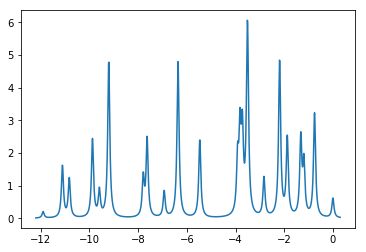

In [58]:
plt.plot(x,d)

In [59]:
energies = np.array([0,1,2])
weights = np.array([1,1,0.5])

In [63]:
dos = U.Dos(energies,weights,label='lalla',broad_kind=U.lorentzian) #,maxVal=3,minVal=-1)

label lalla
values [0 1 2]
weights [1.  1.  0.5]
minVal -0.5
maxVal 2.5
broad_kind <function lorentzian at 0x7fe2b3d3ed90>


In [64]:
x,d = dos.dos[0]

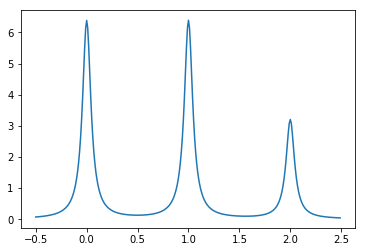

In [65]:
plt.plot(x,d)

In [72]:
dos = U.Dos.from_Pw(results='QeCalculator_test/si_scf_test1.save/data-file-schema.xml',
                    label='si',broad_kind=U.gaussian,eta = 0.1)

label si
values [-1.19029411e+01 -1.84464681e-05 -5.08766362e-10  0.00000000e+00
 -1.11087489e+01 -3.91440876e+00 -7.55263374e-01 -7.55250078e-01
 -9.59279042e+00 -6.92990471e+00 -1.19276024e+00 -1.19274719e+00
 -1.08285059e+01 -3.52488972e+00 -1.87502267e+00 -1.87501711e+00
 -9.20685344e+00 -6.36138447e+00 -3.50631324e+00 -2.18897081e+00
 -9.87493942e+00 -5.46742718e+00 -3.71910972e+00 -1.31945095e+00
 -7.79008863e+00 -7.79007701e+00 -2.83151476e+00 -2.83151036e+00
 -7.63045739e+00 -7.63044497e+00 -3.81546914e+00 -3.81546352e+00
 -1.11087477e+01 -3.91442006e+00 -7.55252288e-01 -7.55252287e-01
 -9.59278222e+00 -6.92992193e+00 -1.19275042e+00 -1.19275042e+00
 -9.20685378e+00 -6.36138176e+00 -3.50632288e+00 -2.18896502e+00
 -9.20684836e+00 -6.36139756e+00 -3.50631106e+00 -2.18896583e+00
 -9.87493673e+00 -5.46743885e+00 -3.71910779e+00 -1.31944352e+00]
weights [0.03125 0.03125 0.03125 0.03125 0.1875  0.1875  0.1875  0.1875  0.09375
 0.09375 0.09375 0.09375 0.1875  0.1875  0.1875  0.1875  

In [73]:
x,d = dos.dos[0]

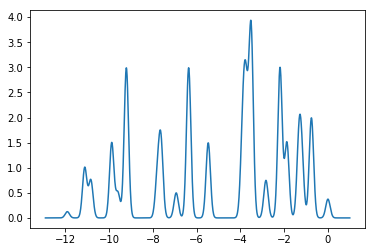

In [74]:
plt.plot(x,d)

In [ ]:
########################################################################################

In [37]:
def build_histo(values,weights=None,minVal=None,maxVal=None):
    print('values',values)
    print('weights',weights)
    print('minVal',minVal)
    print('maxVal',maxVal)
    return (1,1)
    
class Dos():
    
    def __init__(self, energies=None, weights=None, label = None, **kwargs):
        self.dos = []
        self.labels = []
        if energies is not None:
            self.append(energies,weights=weights,label=label,**kwargs)
            
    def append(self,energies, weights = None, label = None,
            minVal = None, maxVal = None):
        """
        This method add the tuple (x,histo) generated by the function build_histogram
        to the members of the class.
        """
        self.dos.append(build_histo(energies,weights,minVal,maxVal))
        lbl = label if label is not None else str(len(self.labels)+1)
        self.labels.append(lbl)

In [74]:
energies = np.array([0,1,2])
weights = np.array([1,1,0.5])

In [75]:
dos = U.Dos(energies,weights,label='lalla',maxVal=3,minVal=-1)

values [0 1 2]
weights [1.  1.  0.5]
minVal -1
maxVal 3


In [76]:
x,d = dos.dos[0]

In [77]:
import matplotlib.pyplot as plt

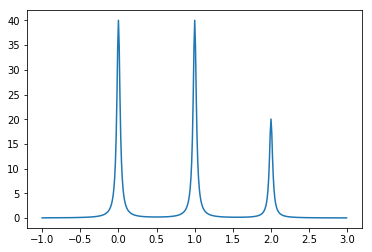

In [78]:
plt.plot(x,d)

In [ ]:
########################################################################################################

In [4]:
#from whypy

def histogram_eiv(eiv,weights,emin=-5.0,emax=5.0,step=0.01,sigma=0.05,ctype='lorentzian'):
    """
    Histogram of eigenvalues
    """
    #eiv = np.array(eiv)
    #sigma = 0.005
    x = np.arange(emin,emax,step,dtype=np.float32)
    y = np.zeros([len(x)],dtype=np.float32)

    if ctype == 'gaussian':
        from math import sqrt
        c =  1.0/(sigma*sqrt(2))
        a = -1.0/(2*sigma)

    else:
        #lorentzian stuff
        s2 = (.5*sigma)**2
        c = (.5*sigma)

    eiv     = eiv.flatten()
    weights = weights.flatten()

    weights = weights[emin < eiv]
    eiv     = eiv[emin < eiv]
    weights = weights[eiv < emax]
    eiv     = eiv[eiv < emax]

    if ctype == 'gaussian':
        for e,w in zip(eiv,weights):
            x1 = (x-e)**2
            #add gaussian
            y += w*c*np.exp(a*x1)
    else:
        #lorentzian stuff
        for e,w in zip(eiv,weights):
            x1 = (x-e)**2
            #add lorentzian
            y += w*c/(x1+s2)
    return x, y

In [70]:
def getDOS(self,broad=0.1,emin=-10,emax=10,step=0.01,ctype="lorentzian"):
        """
        Calculate the density of states.
        Should work for metals as well but untested for that case
        """
        eigenvalues = self.eigenvalues_ibz
        weights = self.weights_ibz
        nkpoints = self.nkpoints_ibz

        na = np.newaxis
        weights_bands = np.ones(eigenvalues.shape,dtype=np.float32)*weights[:,na]
        energies, self.dos = histogram_eiv(eigenvalues,weights_bands,emin=emin,emax=emax,step=step,sigma=broad,ctype=ctype)

        return energies, self.dos

    def get_transitions(self):
        """
        Calculate transition energies
        """
        eigenvalues = self.eigenvalues_ibz
        nvalence  = self.nbandsv
        nconduction  = self.nbandsc
        nkpoints = self.nkpoints_ibz

        transitions = np.zeros([nkpoints,nvalence*nconduction])
        for k,v,c in product(range(nkpoints),range(nvalence),range(nconduction)):
            vc = v*nvalence+c
            transitions[k,vc] = eigenvalues[k,c+nvalence]-eigenvalues[k,v]
        self.transitions = transitions

        return self.transitions

    def getJDOS(self,broad=0.1,emin=0,emax=10,step=0.01,ctype="lorentzian"):
        """
        Calculate the joint density of states
        """
        transitions = self.get_transitions()
        weights = self.weights_ibz

        na = np.newaxis
        weights_transitions = np.ones(transitions.shape,dtype=np.float32)*weights[:,na]
        energies, self.jdos = histogram_eiv(self.transitions,weights_transitions,emin=emin,emax=emax,step=step,sigma=broad,ctype=ctype)

        return energies, self.jdos

IndentationError: unindent does not match any outer indentation level (<ipython-input-70-1e03aafc8b28>, line 16)

The analysis starts from the get_evals of PwParser

In [110]:
import numpy as np

In [111]:
si_scf = P.PwParser('QeCalculator_test/si_scf_test1.save/data-file-schema.xml')

Parse file : QeCalculator_test/si_scf_test1.save/data-file-schema.xml


In [112]:
energies = si_scf.get_evals()
weights = si_scf.weights

In [113]:
energies[0]

array([-1.19029411e+01, -1.84464681e-05, -5.08766362e-10,  0.00000000e+00])

In [114]:
weights

array([[0.03125],
       [0.1875 ],
       [0.09375],
       [0.1875 ],
       [0.375  ],
       [0.1875 ],
       [0.09375],
       [0.1875 ],
       [0.0625 ],
       [0.03125],
       [0.1875 ],
       [0.1875 ],
       [0.1875 ]])

In [115]:
a = np.array([[2],[2],[3],[4],[5]])

In [116]:
b = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5]])

In [117]:
a*b

array([[ 2,  2,  2],
       [ 4,  4,  4],
       [ 9,  9,  9],
       [16, 16, 16],
       [25, 25, 25]])

In [118]:
np.ones(b.shape)*a

array([[2., 2., 2.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.]])

In [119]:
weights.shape

(13, 1)

In [120]:
energies.shape

(13, 4)

In [121]:
np.ones(energies.shape,dtype=np.float32)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [122]:
weights_bands = np.ones(energies.shape)*weights #,dtype=np.float32

In [123]:
weights_bands

array([[0.03125, 0.03125, 0.03125, 0.03125],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ],
       [0.09375, 0.09375, 0.09375, 0.09375],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ],
       [0.375  , 0.375  , 0.375  , 0.375  ],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ],
       [0.09375, 0.09375, 0.09375, 0.09375],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ],
       [0.0625 , 0.0625 , 0.0625 , 0.0625 ],
       [0.03125, 0.03125, 0.03125, 0.03125],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ],
       [0.1875 , 0.1875 , 0.1875 , 0.1875 ]])

In [124]:
energies = energies.flatten()
weights_bands = weights_bands.flatten()

In [125]:
len(energies)

52

In [126]:
def lorentzian(eta,x0,x):
    """
    Get the lorentzian function
    """
    s2 = (.5*eta)**2
    c = (.5*eta)
    x1 = (x-x0)**2
    return c/(x1+s2)

def gaussian(eta,x0,x):
    """
    Get the gaussian function. Scale eta...
    """
    c =  1.0/(eta*sqrt(2))
    a = -1.0/(2*eta)
    x1 = (x-x0)**2
    return c*np.exp(a*x1)

In [150]:
def build_histogram(values,weights=None,minVal=None,maxVal=None,step=0.01,eta=0.05,broad_kind=lorentzian):
    """
    This function build the histogram associated to a generic one-dimensional array. 
    If the weights are not specified a uniform array of weights, normalized to one, is assumed.
    
    Args:
        energies (:py:class:`numpy.array') : one-dimensional array with the values of the energy
        weights (:py:class:`numpy.array') : one-dimensional array with the weight of each value.
            If None a uniform array normalized to one is used
        minVal (float) : values lower than this parameter are not included in the histogram
        maxVal (float) : values higher than this parameter are not included in the histogram
        step (float) : size of the bin (in the same units used for the values array)
        eta (float) : magnitude of the broading parameter (in the same units used for the values array)
        broad_kind (string) : type of broading function used (lorentzian, gaussian)
    
    Return:
        x (:py:class:`numpy.array') : x axis of the histogram
        histo (:py:class:`numpy.array') : histogram values
    """
    import numpy as np
    
    # set the weights and the range
    if weights is None:
        weights = np.ones(len(values))/len(values)
    if minVal is None:
        minVal = values.min() # - eta*something
    if minVal is None:
        maxVal = energies.max() # + eta*
       
    #cut the values and weights out from the range [emin,emax]
    weights = weights[minVal < values]
    values = values[minVal < values]
    weights = weights[values < maxVal]
    values = values[values < maxVal]
    
    x = np.arange(minVal,maxVal,step)
    histo = np.zeros([len(x)])
    
    for v,w in zip(values,weights):
        histo += w*broad_kind(eta,v,x)
        
    return x, histo

In [153]:
x, histo = build_histogram(energies,weights_bands,eta=0.5,minVal=-15,maxVal=5)

In [154]:
import matplotlib.pyplot as plt

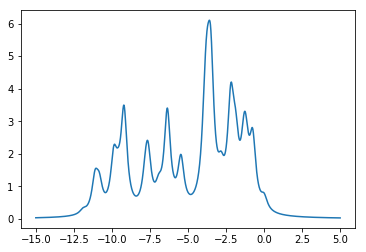

In [155]:
plt.plot(x,histo)

In [141]:
weights_bands[-5<energies]

array([0.03125, 0.03125, 0.03125, 0.1875 , 0.1875 , 0.1875 , 0.09375,
       0.09375, 0.1875 , 0.1875 , 0.1875 , 0.375  , 0.375  , 0.1875 ,
       0.1875 , 0.09375, 0.09375, 0.1875 , 0.1875 , 0.0625 , 0.0625 ,
       0.0625 , 0.03125, 0.03125, 0.1875 , 0.1875 , 0.1875 , 0.1875 ,
       0.1875 , 0.1875 ])

In [142]:
e,d = histogram_eiv(energies,weights_bands,emin=-15,emax=5,sigma=0.5)

In [143]:
import matplotlib.pyplot as plt

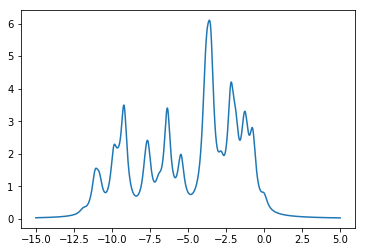

In [144]:
plt.plot(e,d)

In [25]:
eflat = eng.flatten()

In [26]:
eflat[0:7]

array([-1.19029411e+01, -1.84464681e-05, -5.08766362e-10,  0.00000000e+00,
       -1.11087489e+01, -3.91440876e+00, -7.55263374e-01])

In [27]:
weights

[0.03125,
 0.1875,
 0.09375,
 0.1875,
 0.375,
 0.1875,
 0.09375,
 0.1875,
 0.0625,
 0.03125,
 0.1875,
 0.1875,
 0.1875]

In [10]:
########################

In [ ]:
############ REMOVE ################################

In [22]:
Dos = results.Dos()
energy = Dos[:,0]
dos = Dos[:,1]

Fermi energy attribute not found in the ouput file. Maybe `fixed` occupation type is used?


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [15]:
import matplotlib.pyplot as plt

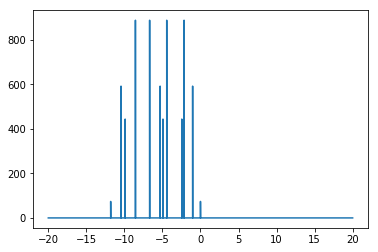

In [16]:
plt.plot(energy,dos)

...broad still to be tested....

The Dos method will be removed from the parser and a more complete Dos class will be introduced.

## From PyBigDFT

In [28]:
import numpy as np

In [29]:
energies = np.array([-0.815924953235059, -0.803163374736654,
                         -0.780540200987971, -0.7508806541364,
                         -0.723626807289917, -0.714924448617026,
                         -0.710448085701742, -0.68799028016451,
                         -0.67247569974853, -0.659038909236607,
                         -0.625396293324399, -0.608009041659988,
                         -0.565337910777367, -0.561250536074343,
                         -0.551767438323268, -0.541295070404525,
                         -0.532326667587434, -0.515961980147107,
                         -0.474601108285518, -0.473408476151224,
                         -0.46509070541069, -0.445709086452906,
                         -0.433874403837837, -0.416121660651406,
                         -0.407871082254237, -0.406123490618786,
                         -0.403004188319382, -0.38974739285104,
                         -0.380837488456638, -0.375163102271681,
                         -0.375007771592681, -0.367898783582561,
                         -0.367518948507212, -0.359401585874402,
                         -0.358189406008502, -0.354517727598174,
                         -0.334286389724978, -0.332921810616845,
                         -0.315466259109401, -0.308028853904577,
                         -0.29864142362141, -0.294024743731349,
                         -0.292104129933301, -0.285165738729842,
                         -0.28419932605141, -0.267399999874122,
                         -0.259487769142101, -0.239899780812716,
                         -0.224858003804207, -0.20448050758473,
                         -0.164155133452971, -0.117617164459898,
                         -0.0717938081884113, -0.0526986239898579,
                         -0.0346031190163735, -0.0167949342608791,
                         -0.0135168064347152, -0.0102971895842409,
                         0.00759271179427191, 0.00974950976249545,
                         0.010176021051287, 0.0217652761059223,
                         0.0239924727094222, 0.0413057846713024,
                         0.0422334333464529, 0.0459150454793617,
                         0.0517637894860314])
    

In [30]:
dos = U.DoS(energies=energies, fermi_level=-0.1,sigma = 0.01)

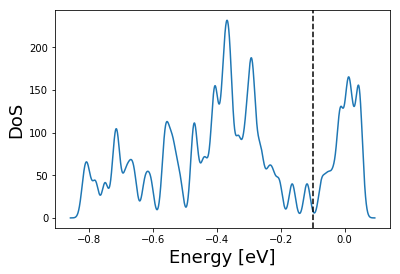

In [31]:
%matplotlib inline
#dos.append(0.2+energies)
dos.plot()

## From yambopy

In [51]:
from yambopy.dbs import electronsdb as E, savedb as S, latticedb as L

In [53]:
#lat = L.YamboLatticeDB.from_db_file('QeCalculator_test/si_nscf_test1.save/SAVE/ns.db1')
lat = L.YamboLatticeDB.from_db_file('Ypp_bands/SAVE/ns.db1')

In [54]:
#db = E.YamboElectronsDB(lat,save = 'QeCalculator_test/si_nscf_test1.save/SAVE')
db = E.YamboElectronsDB(lat,save = 'Ypp_bands/SAVE')

In [55]:
e,d = db.getDOS()

In [56]:
import matplotlib.pyplot as plt

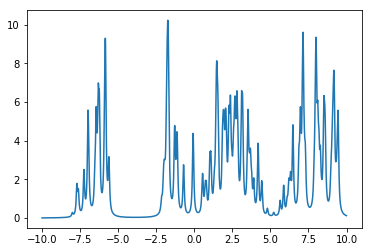

In [57]:
plt.plot(e,d)

In [62]:
w = db.weights_ibz
w

array([0.00462963, 0.03703704, 0.03703704, 0.01851852, 0.02777778,
       0.11111111, 0.11111111, 0.11111111, 0.05555556, 0.02777778,
       0.11111111, 0.05555556, 0.01388889, 0.11111111, 0.11111111,
       0.05555556], dtype=float32)

In [66]:
w.sum()

1.0

In [64]:
e = db.eigenvalues_ibz.flatten()
e

masked_array(data=[-8.010908  , -8.010908  ,  4.442529  ,  4.442529  ,
                    4.7991805 ,  4.7991805 ,  4.7991805 ,  4.7991805 ,
                    5.2171874 ,  5.2171874 ,  8.363313  ,  8.363313  ,
                   -7.7146354 , -7.7146354 ,  1.9519235 ,  1.9519235 ,
                    4.20087   ,  4.20087   ,  4.428937  ,  4.428937  ,
                    6.32372   ,  6.32372   ,  8.979718  ,  8.979718  ,
                   -6.9417553 , -6.9417553 , -0.7000823 , -0.7000823 ,
                    3.6815841 ,  3.6815841 ,  3.9034274 ,  3.9034274 ,
                    5.8700395 ,  5.8700395 ,  9.38544   ,  9.38544   ,
                   -6.3677006 , -6.3677006 , -1.9329181 , -1.9329181 ,
                    3.4784439 ,  3.4784439 ,  3.6986768 ,  3.6986768 ,
                    5.6397405 ,  5.6397405 ,  9.312462  ,  9.312462  ,
                   -7.613567  , -7.613567  ,  1.9417492 ,  1.9417492 ,
                    3.6193492 ,  3.6193492 ,  3.7657745 ,  3.7657745 ,
      

In [65]:
db.lattice.kpoints_indexes

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [68]:
bla = w[-10 < e]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 192